<a href="https://colab.research.google.com/github/anthonysalvatore/comp-machine-learning-a2/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 2: Classify Images of Cancer**

## Setting environment, loading data

In [1]:
!git clone https://github.com/anthonysalvatore/comp-machine-learning-a2 # only run in colab

Cloning into 'comp-machine-learning-a2'...
remote: Enumerating objects: 20293, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 20293 (delta 0), reused 7 (delta 0), pack-reused 20286
Receiving objects: 100% (20293/20293), 70.75 MiB | 22.11 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (20286/20286), done.


In [3]:
import pandas as pd

# load the CSV files
main_data = pd.read_csv('comp-machine-learning-a2/Image_classification_data/data_labels_mainData.csv') # change path if not in colab
extra_data = pd.read_csv('comp-machine-learning-a2/Image_classification_data/data_labels_extraData.csv')

## EDA

         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000     1.000000     0.000000
50%     9279.500000    26.000000     2.000000     0.000000
75%    16821.250000    47.000000     2.000000     1.000000
max    22444.000000    60.000000     3.000000     1.000000


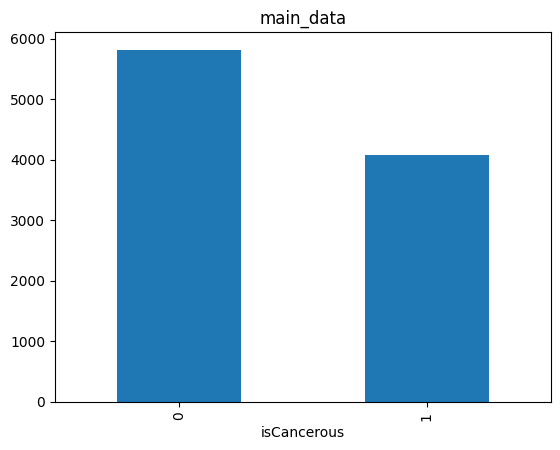

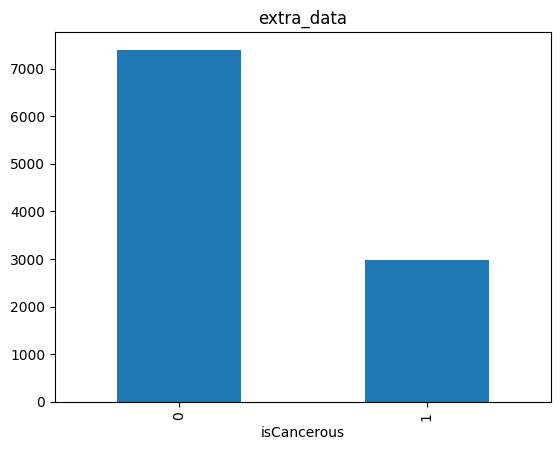

In [15]:
import matplotlib.pyplot as plt

# display summary statistics of main_data
print(main_data.describe())

# visualize the distribution of isCancerous
main_data['isCancerous'].value_counts().plot(kind='bar')
plt.title('main_data')
plt.xlabel('isCancerous')
plt.show()

extra_data['isCancerous'].value_counts().plot(kind='bar')
plt.title('extra_data')
plt.xlabel('isCancerous')
plt.show()

# display a sample image
from PIL import Image

img = Image.open('comp-machine-learning-a2/Image_classification_data/patch_images/1.png')
img.show()

Main data is fairly evenly distributed between two classes. Extra data is fairly skewed though, with a ratio of about 2:1 in favour of not cancerous class.

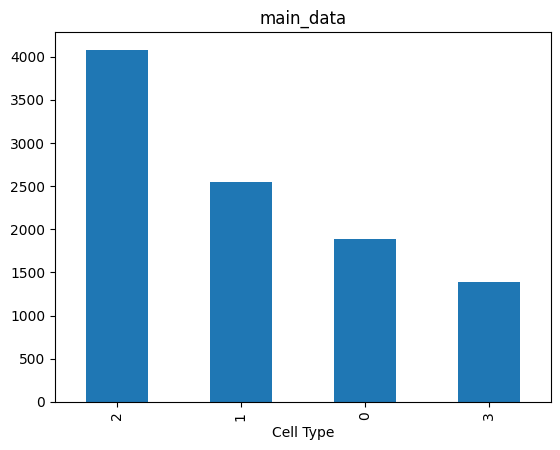

In [14]:
# visualize the distribution of cellType
main_data['cellType'].value_counts().plot(kind='bar')
plt.title('main_data')
plt.xlabel('Cell Type')
plt.show()

The distribution above shows most images in the main_data sample are of type 2 (epithelial). The keys are as follows:
<br>
0.   fibroblast
1.   inflammatory
2.   epithelial
3.   others 

We will now plot the cell type against the isCancerous field using a stacked bar chart, to determine if there is any relationship between the two.





<Axes: xlabel='cellType'>

<Figure size 800x600 with 0 Axes>

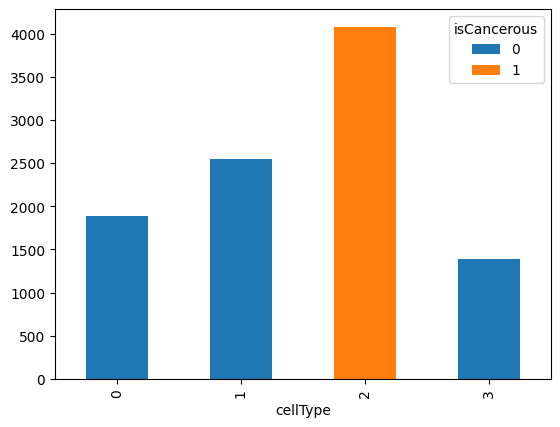

In [17]:
plt.figure(figsize=(8,6))
main_data.groupby(['cellType', 'isCancerous']).size().unstack().plot(kind='bar', stacked=True)

Visually, we can see that all cells of type 2, are cancerous, while every other type of cell is non-cancerous. We can confirm the results through a cross table:

In [19]:
table = pd.crosstab(main_data['cellType'], main_data['isCancerous'])
print(table)

isCancerous     0     1
cellType               
0            1888     0
1            2543     0
2               0  4079
3            1386     0


The cross table confirms the suspicions from the barchart, that all cancerous cells belong to the epitherial cell type. While epitherial cells are the most common type of cell in which cancers develop [1], they are obivoulsy not all cancerous cells themselves in a real-life setting. Despite this, we will be proceeding with the assumption that every cell of type 2 is cancerous as this is how the data has been presented in this case study.

## References

[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3927155/#:~:text=Epithelial%20tissue%20is%20also%20the,percent%20of%20all%20human%20cancers.